# Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving OECD.STI.PIE,DSD_STAN@DF_STAN,1.0+A.DEU..B1G.V.XDC.csv to OECD.STI.PIE,DSD_STAN@DF_STAN,1.0+A.DEU..B1G.V.XDC.csv


In [3]:
df = pd.read_csv('OECD.STI.PIE,DSD_STAN@DF_STAN,1.0+A.DEU..B1G.V.XDC.csv')

## dataset information

In [4]:
#Check first few entries
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Frequency of observation,REF_AREA,Reference area,ACTIVITY,Economic activity,...,BASE_PER,Base period,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,EST_METHOD,Estimation methodology,OBS_STATUS,Observation status
0,DATAFLOW,OECD.STI.PIE:DSD_STAN@DF_STAN(1.0),STAN Database for Structural Analysis,I,A,Annual,DEU,Germany,D,"Electricity, gas, steam and air conditioning s...",...,NaN,NaN,6,Millions,1,One,NaN,NaN,A,Normal value
1,DATAFLOW,OECD.STI.PIE:DSD_STAN@DF_STAN(1.0),STAN Database for Structural Analysis,I,A,Annual,DEU,Germany,D,"Electricity, gas, steam and air conditioning s...",...,NaN,NaN,6,Millions,1,One,NaN,NaN,A,Normal value
2,DATAFLOW,OECD.STI.PIE:DSD_STAN@DF_STAN(1.0),STAN Database for Structural Analysis,I,A,Annual,DEU,Germany,E,"Water supply; sewerage, waste management and r...",...,NaN,NaN,6,Millions,1,One,NaN,NaN,A,Normal value
3,DATAFLOW,OECD.STI.PIE:DSD_STAN@DF_STAN(1.0),STAN Database for Structural Analysis,I,A,Annual,DEU,Germany,A02,Forestry and logging,...,NaN,NaN,6,Millions,1,One,NaN,NaN,A,Normal value
4,DATAFLOW,OECD.STI.PIE:DSD_STAN@DF_STAN(1.0),STAN Database for Structural Analysis,I,A,Annual,DEU,Germany,A03,Fishing and aquaculture,...,NaN,NaN,6,Millions,1,One,NaN,NaN,A,Normal value


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 770 non-null    object 
 1   STRUCTURE_ID              770 non-null    object 
 2   STRUCTURE_NAME            770 non-null    object 
 3   ACTION                    770 non-null    object 
 4   FREQ                      770 non-null    object 
 5   Frequency of observation  770 non-null    object 
 6   REF_AREA                  770 non-null    object 
 7   Reference area            770 non-null    object 
 8   ACTIVITY                  770 non-null    object 
 9   Economic activity         770 non-null    object 
 10  MEASURE                   770 non-null    object 
 11  Measure                   770 non-null    object 
 12  PRICE_BASE                770 non-null    object 
 13  Price base                770 non-null    object 
 14  UNIT_MEASU

In [6]:
df.isnull().sum()

,0
STRUCTURE,0
STRUCTURE_ID,0
STRUCTURE_NAME,0
ACTION,0
FREQ,0
Frequency of observation,0
REF_AREA,0
Reference area,0
ACTIVITY,0
Economic activity,0


# EDA

## Summary Statistics

In [8]:
df.describe()

,TIME_PERIOD,Time period,OBS_VALUE,Observation value,BASE_PER,Base period,UNIT_MULT,DECIMALS
count,770.000000,0.0,7.700000e+02,0.0,0.0,0.0,770.0,770.0
mean,2017.000000,NaN,1.629251e+05,NaN,NaN,NaN,6.0,1.0
std,1.415133,NaN,3.753661e+05,NaN,NaN,NaN,0.0,0.0
min,2015.000000,NaN,0.000000e+00,NaN,NaN,NaN,6.0,1.0
25%,2016.000000,NaN,1.253650e+04,NaN,NaN,NaN,6.0,1.0
50%,2017.000000,NaN,4.020550e+04,NaN,NaN,NaN,6.0,1.0
75%,2018.000000,NaN,1.251515e+05,NaN,NaN,NaN,6.0,1.0
max,2019.000000,NaN,3.106157e+06,NaN,NaN,NaN,6.0,1.0


## Data Visualization

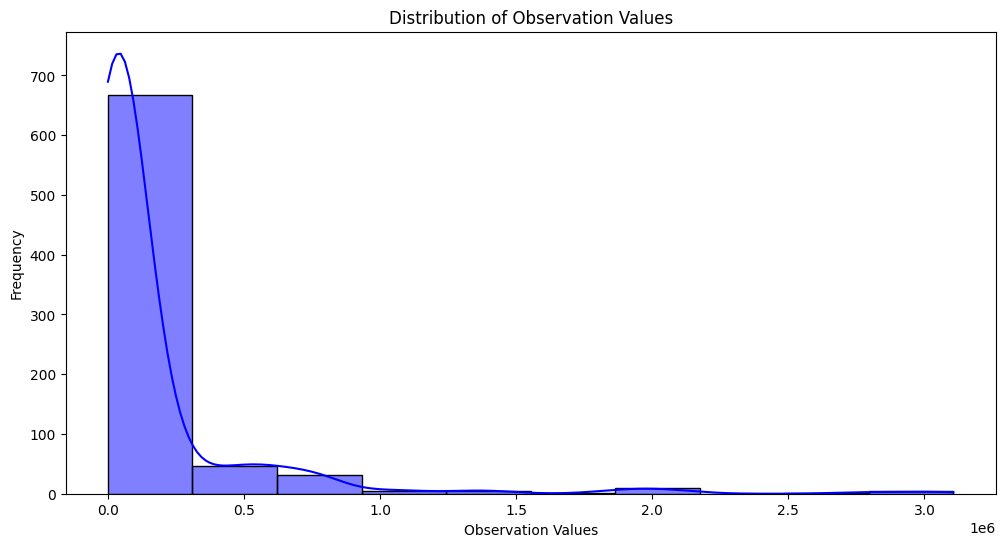

In [9]:
# Visualize value distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['OBS_VALUE'], kde=True, bins=10, color='blue')
plt.title('Distribution of Observation Values')
plt.xlabel('Observation Values')
plt.ylabel('Frequency')
plt.show()

# Structural Analysis

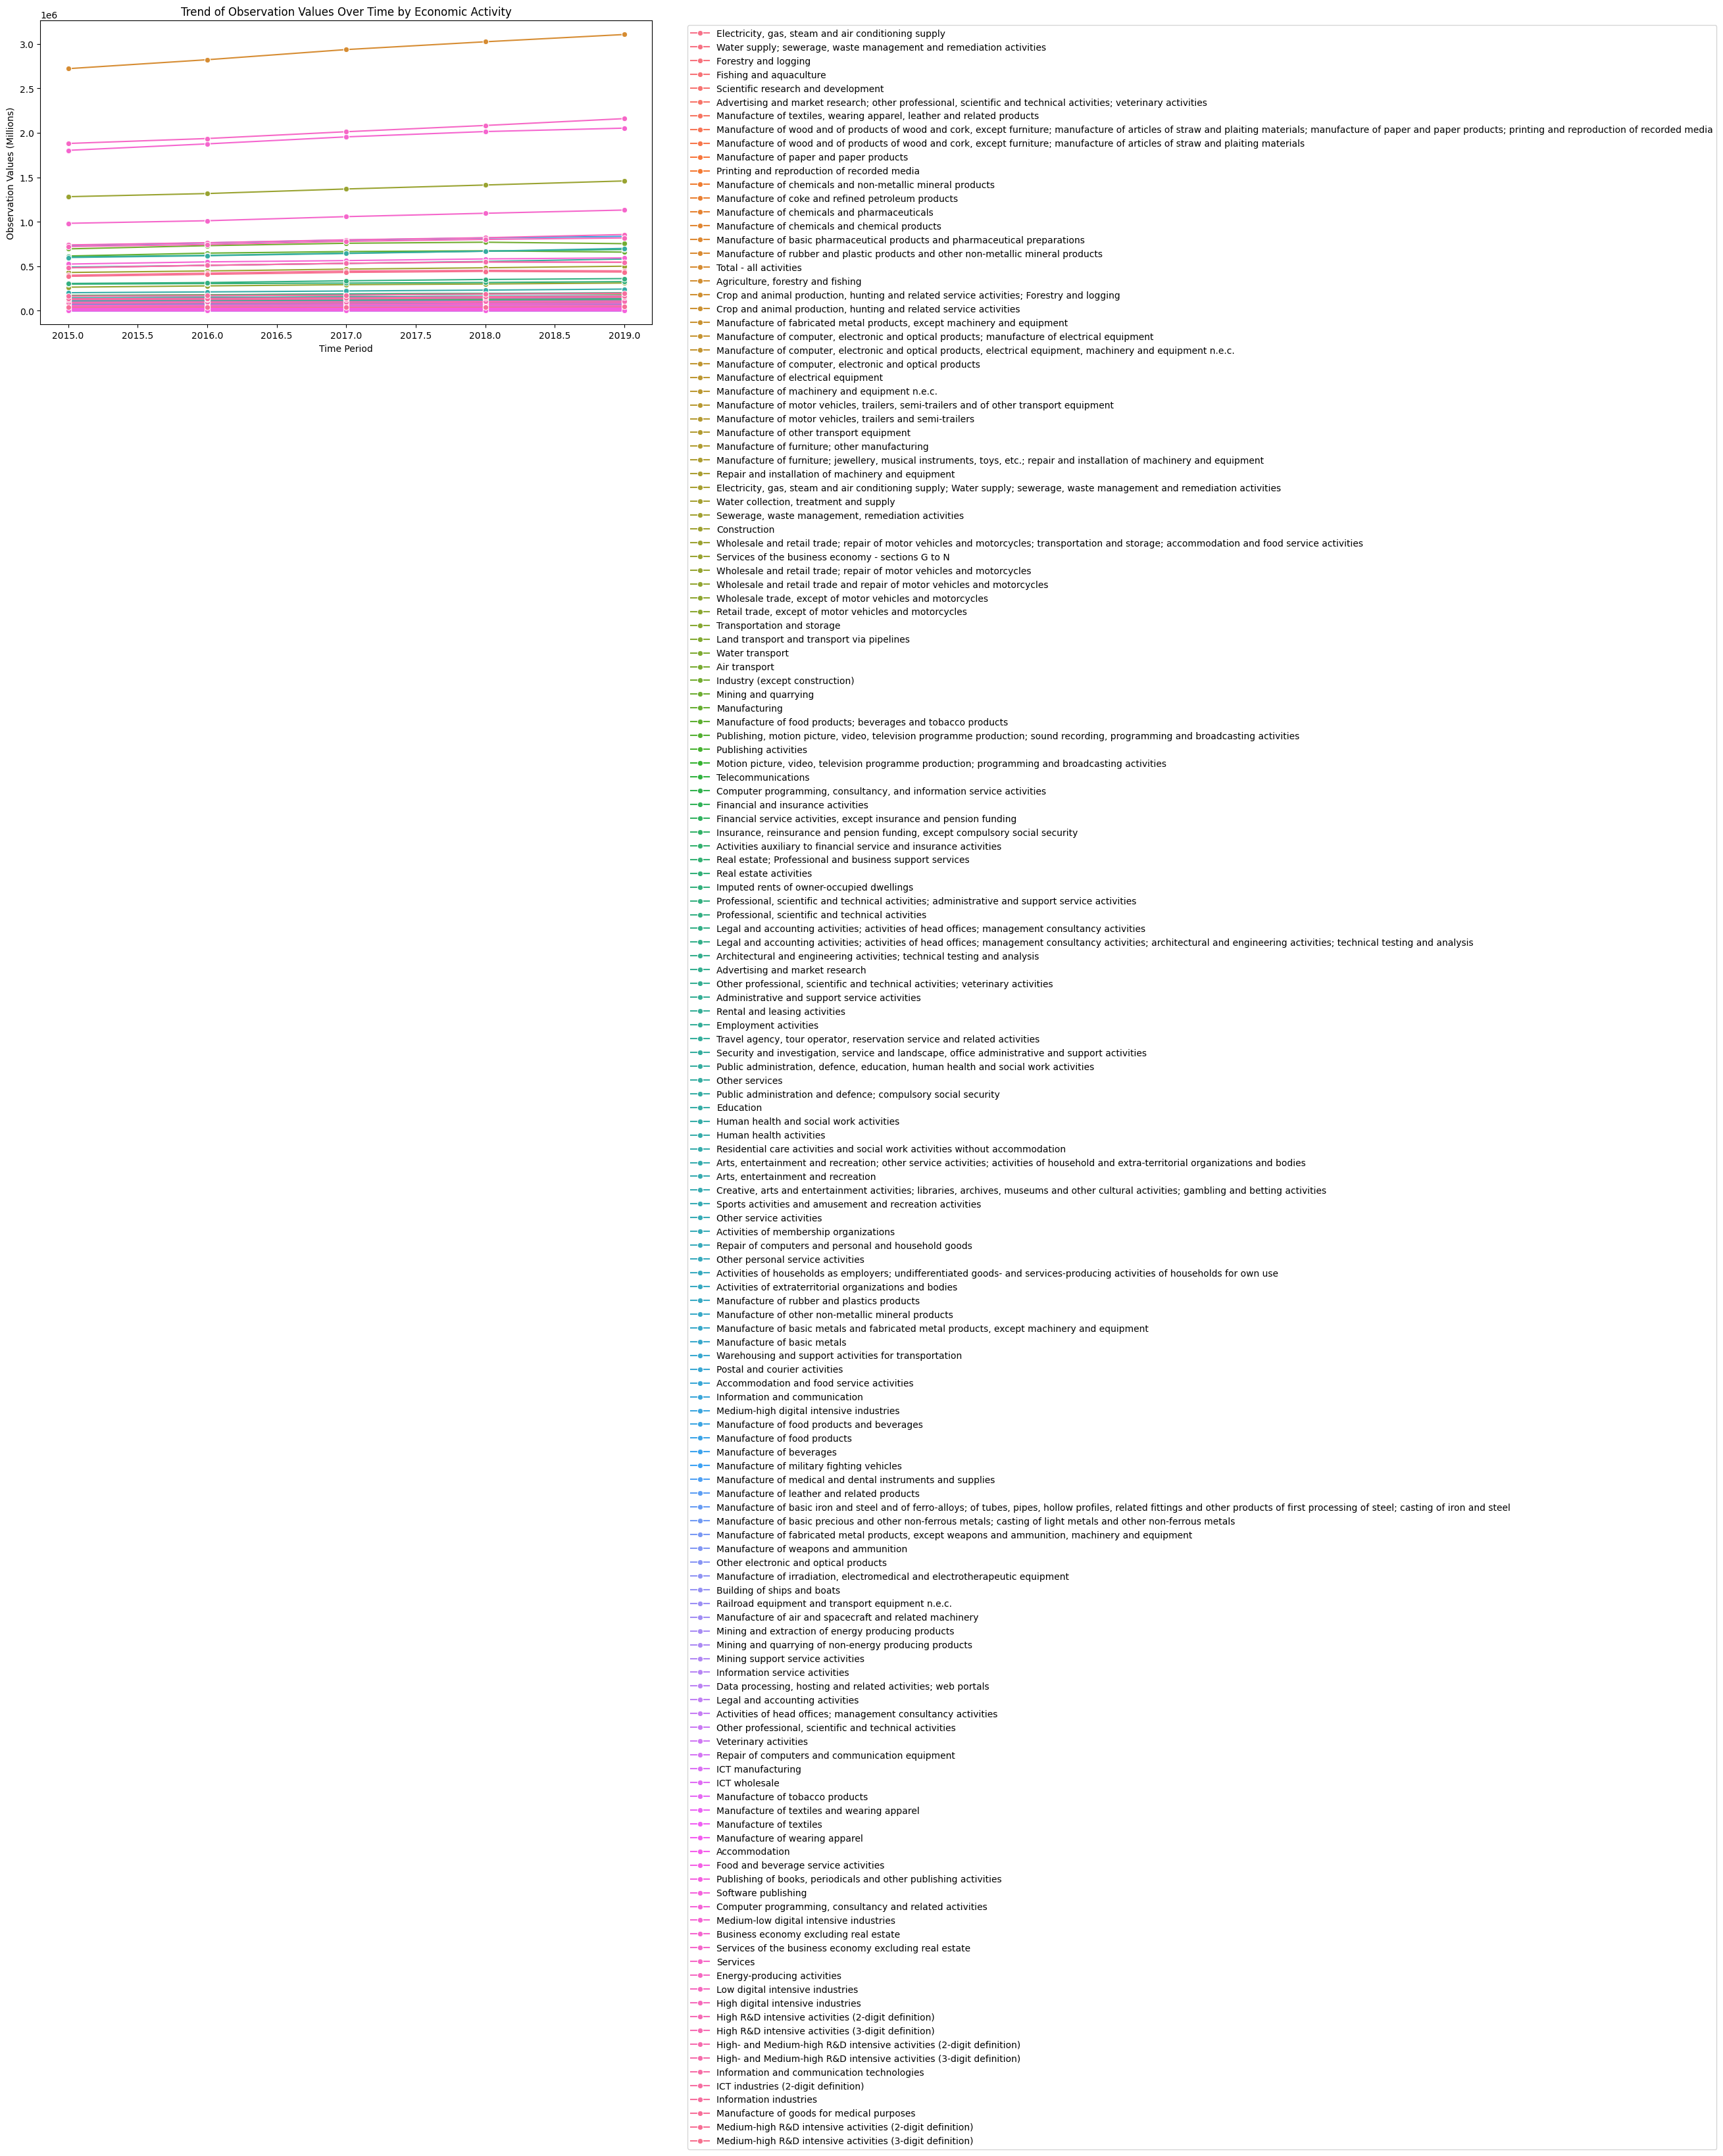

In [12]:
# Trend Analysis for OBS_VALUE over TIME_PERIOD
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="TIME_PERIOD", y="OBS_VALUE", hue="Economic activity", marker="o")
plt.title('Trend of Observation Values Over Time by Economic Activity')
plt.xlabel('Time Period')
plt.ylabel('Observation Values (Millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

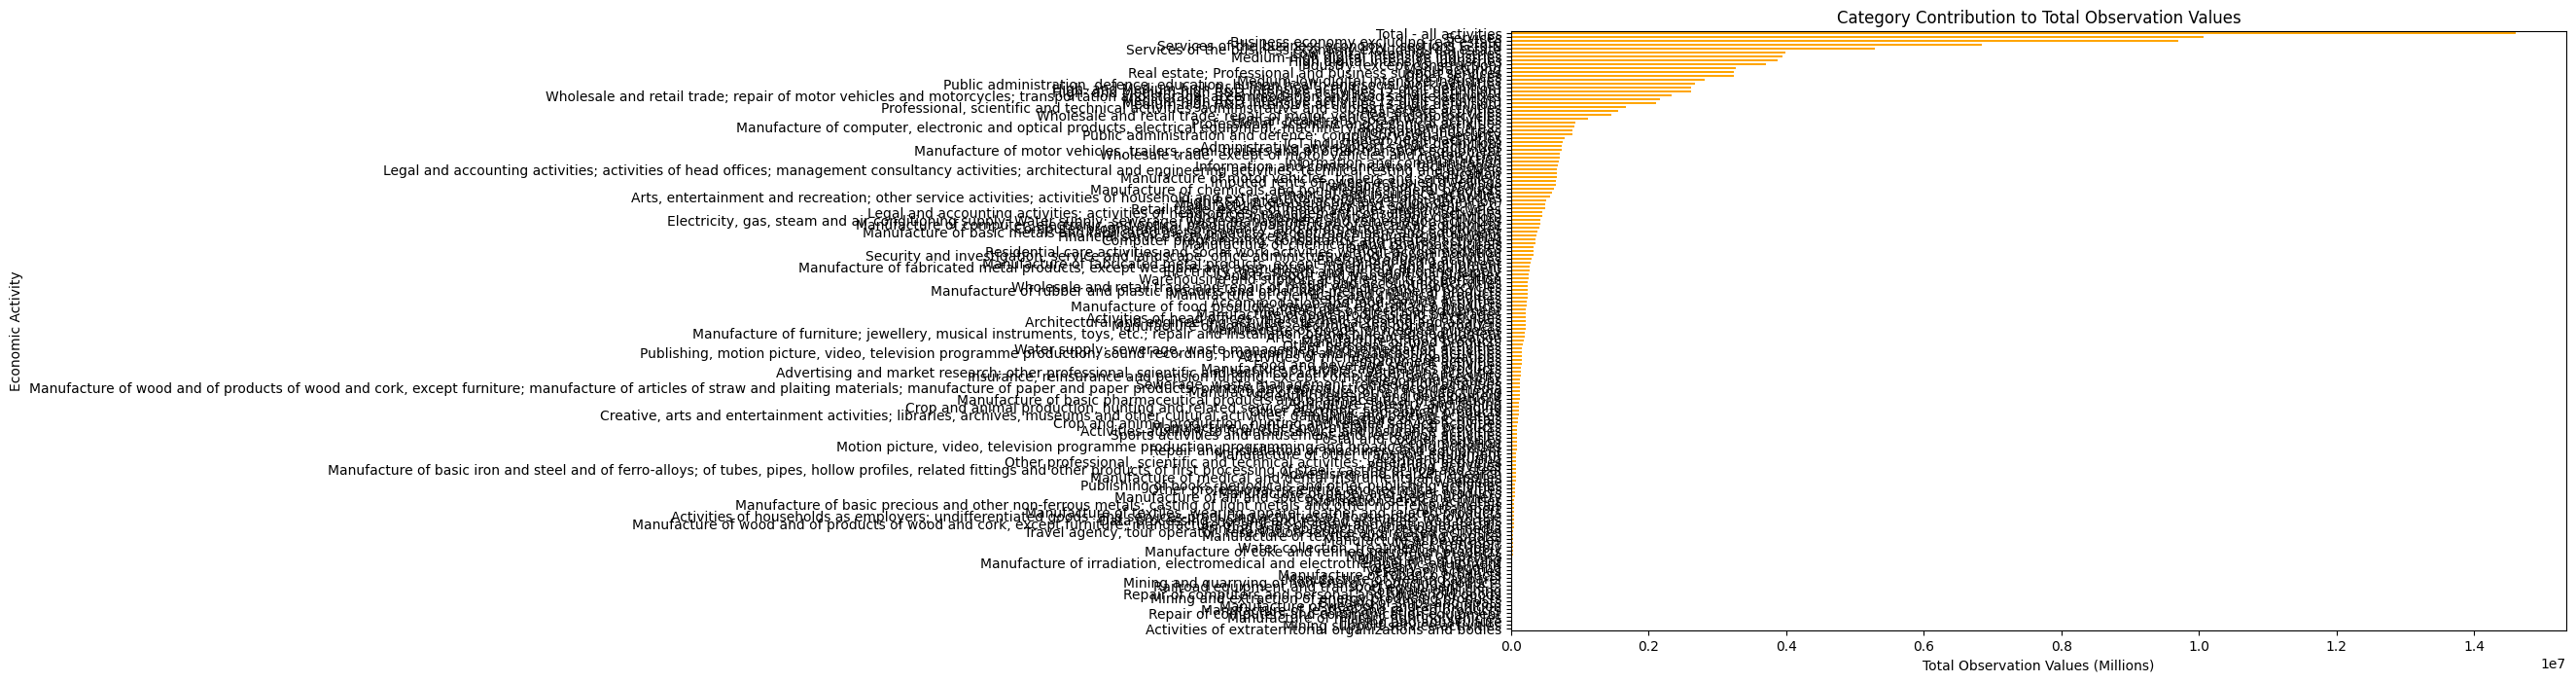

In [13]:
# Category Contribution Analysis
plt.figure(figsize=(14, 8))
df_grouped = df.groupby("Economic activity")["OBS_VALUE"].sum().sort_values()
df_grouped.plot(kind='barh', color='orange')
plt.title('Category Contribution to Total Observation Values')
plt.xlabel('Total Observation Values (Millions)')
plt.ylabel('Economic Activity')
plt.show()

In [15]:
# Comparative Growth Analysis
print("\nComparative Growth Analysis:")
time_periods = df['TIME_PERIOD'].unique()
time_differences = {}
for period in sorted(time_periods):
    subset = df[df['TIME_PERIOD'] == period]
    total_value = subset['OBS_VALUE'].sum()
    time_differences[period] = total_value
print(pd.DataFrame(list(time_differences.items()), columns=["Time Period", "Total OBS_VALUE"]))


Comparative Growth Analysis:
   Time Period  Total OBS_VALUE
0         2015         23340363
1         2016         24232010
2         2017         25238899
3         2018         26028954
4         2019         26612069


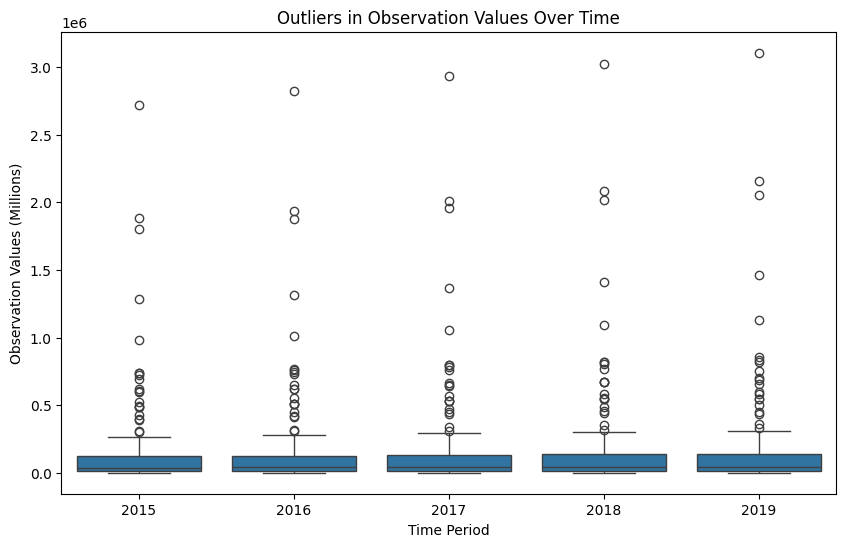

In [16]:
# Outliers in OBS_VALUE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="TIME_PERIOD", y="OBS_VALUE")
plt.title('Outliers in Observation Values Over Time')
plt.xlabel('Time Period')
plt.ylabel('Observation Values (Millions)')
plt.show()

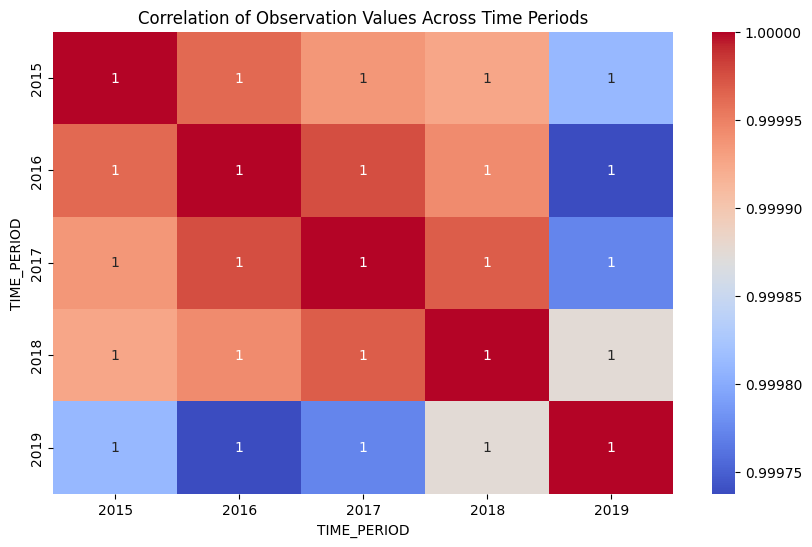

In [17]:
# Correlations Across Time Periods
pivot_df = df.pivot_table(index="Economic activity", columns="TIME_PERIOD", values="OBS_VALUE")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation of Observation Values Across Time Periods')
plt.show()

## Machine Learning Analysis

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Prepare data for ML
df_ml = df[["TIME_PERIOD", "OBS_VALUE"]]
X = df_ml[["TIME_PERIOD"]]
y = df_ml["OBS_VALUE"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 98267671883.32936
R^2 Score: -0.007106651357348559


MSE is the average squared difference between actual and predicted values. A higher value indicates that the model’s predictions are far from the true values.
Here, the MSE is very large because the actual OBS_VALUE (observation values) in the dataset vary significantly (e.g., some are small numbers like 149, while others are large, like 50,136), and the model is not able to fit the data well.


The R² (coefficient of determination) explains the proportion of the variance in the dependent variable (OBS_VALUE) that the model can explain.
An R² of 1.0 represents perfect prediction, whereas 0.0 means the model does no better than predicting the mean of the target.
Negative R² (-0.0071) here suggests that the model performs worse than simply predicting the mean of the OBS_VALUE.

This model performed poorly because,
Limited Features:
The only independent variable used is TIME_PERIOD to predict OBS_VALUE, which likely has weak or no correlation with the target variable. Economic activities in the data likely play a more significant role in explaining OBS_VALUE.

Non-linearity:
The relationship between TIME_PERIOD and OBS_VALUE might not be linear, and the linear regression model struggles to capture any complex patterns.

Data Distribution:
There is a wide range of values for OBS_VALUE (e.g., 149 to 50,136), which could lead to errors in prediction when a simplistic model like linear regression is used without further feature engineering.

Insufficient Data:
The dataset has only 13 rows, which is very small for a machine learning model. This small dataset exacerbates any bias or variance in the model.

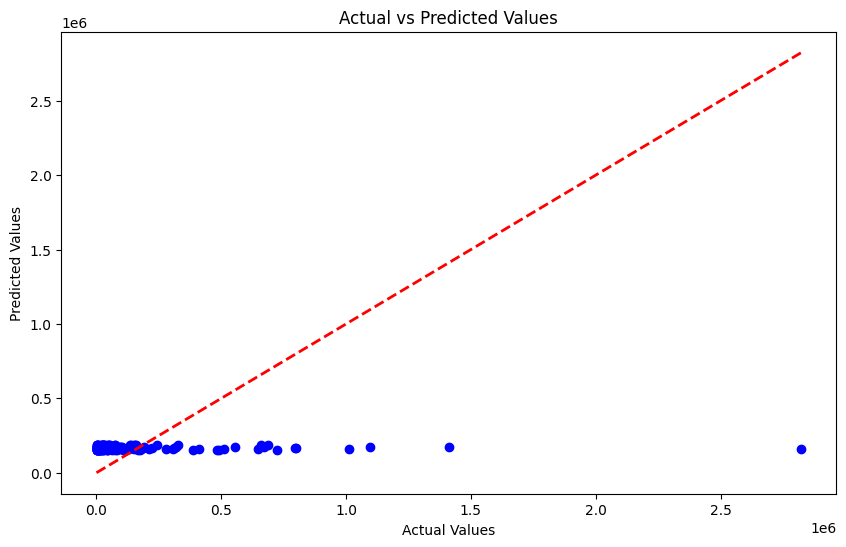

In [21]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()